In [2]:
                                                                                                                                            import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('../data.csv', index_col = 0)

In [4]:
df[['Overall', 'Potential', 'Penalties']].describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
def fix_value(x: str) -> str:
    if (x.find('.') == -1):
        return x
    else:
        return x[:len(x)-1].replace('.', '')

In [9]:
df['Release Clause'] = df[['Release Clause']].fillna('nan')

In [10]:
df['Release Clause'] = df['Release Clause'].replace({
    '€': '',
    'M': '00000',
    'K': '000',
}, regex=True).apply(fix_value).convert_objects(convert_numeric=True)

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


<Figure size 1440x864 with 0 Axes>

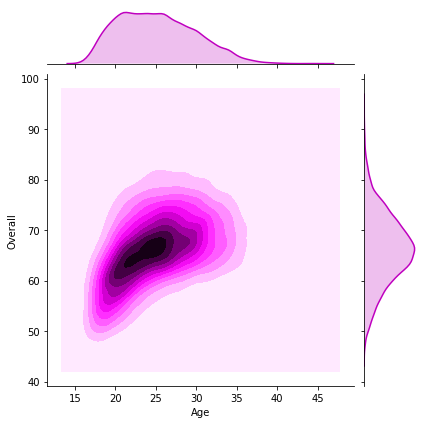

In [51]:
%matplotlib inline
df = df.interpolate()
fig = plt.figure(figsize=(20, 12))
g1 = sns.jointplot(df['Age'], df['Overall'], kind='kde', color='m')
plt.savefig('../stat1')

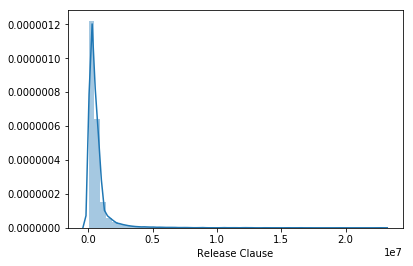

In [52]:
g2 = sns.distplot(df['Release Clause'])
plt.savefig('../stat2')

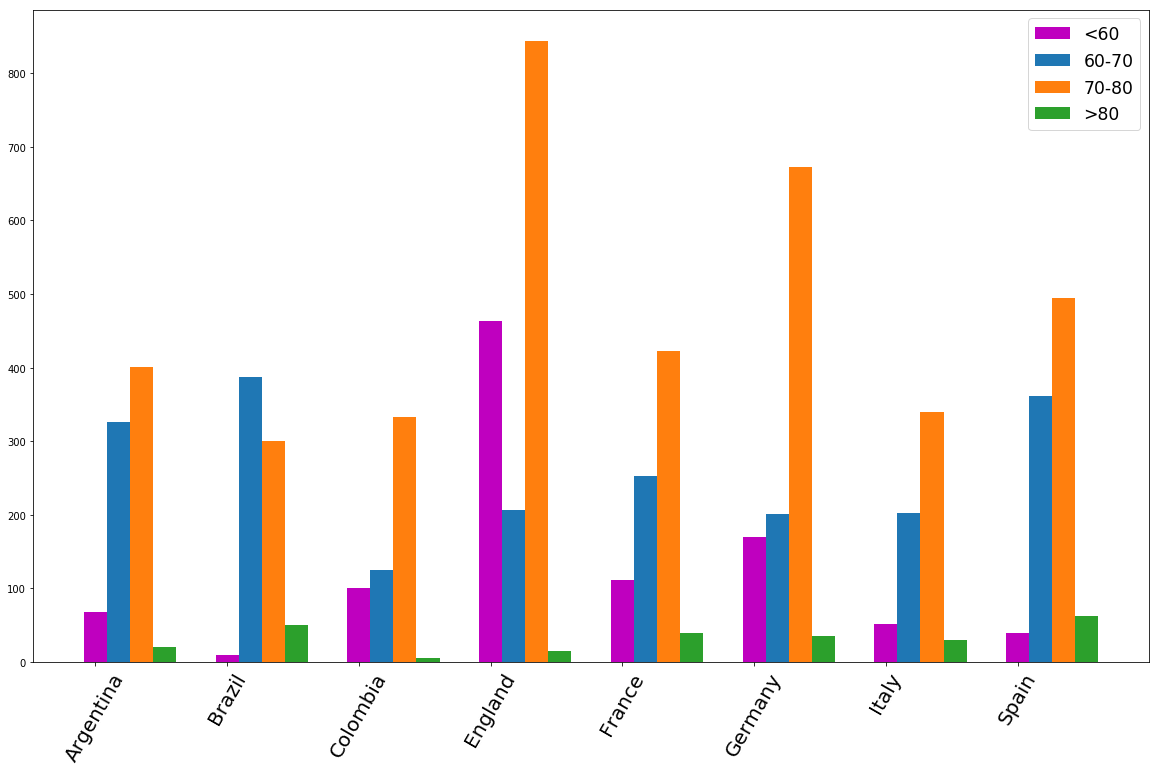

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(20,12))
players = df.groupby('Nationality').filter(lambda x: len(x) > 500)
nations = players.groupby('Nationality')
bar_low60 = []
bar_60_70 = []
bar_70_80 = []
bar_over80 = []
for name, _ in nations:
    country = players[players.Nationality == name]
    bar_over80.append(country[country.Overall > 80]['ID'].count())
    bar_70_80.append(country[(60 < country.Overall) & (70 > country.Overall)]['ID'].count())
    bar_60_70.append(country[(70 < country.Overall) & (80 > country.Overall)]['ID'].count())
    bar_low60.append(country[country.Overall < 60]['ID'].count())
    
barWidth = 0.35
x1 = np.arange(0, 2*len(bar_60_70), 2)
x2 = [barWidth + t for t in x1]
x3 = [barWidth + t for t in x2]
x4 = [barWidth + t for t in x3]
plt.bar(x1, bar_low60, width=barWidth, color='m', label='<60')    
plt.bar(x2, bar_60_70, width=barWidth, label='60-70')
plt.bar(x3, bar_70_80, width=barWidth, label='70-80')
plt.bar(x4, bar_over80, width=barWidth, label='>80')

plt.xticks(range(0, 15, 2), [name for name, _ in nations], rotation=60, fontsize=20)
plt.legend(fontsize='xx-large')
plt.savefig('../stat3')